In [1]:
from smokedetectoroptimization.optimizer import optimize
from smokedetectoroptimization.smoke_source import SmokeSource
from smokedetectoroptimization.constants import (SMOKE_FOLDERS, FALSE_ALARM_FOLDERS,
                                                 ALARM_THRESHOLD, FALSE_ALARM_THRESHOLD)

Run multiobjective optimization with the false alarm source. Uses $\phi$, $\theta$ parameterization and nearest interpolation method.

Parameterization can be "xy", "yz", "xz", "xyz", or "phi_theta"  
Function type can be "multiobjective_competing", "multiobjective_counting", or "worst_case", which is the one we are used to. "fastest" and "second are also supported, but I would not recommend using them.  
Interplolation method can be "nearest", which takes the nearest value, or "linear" or "cubic" The later two seem to take much longer.  

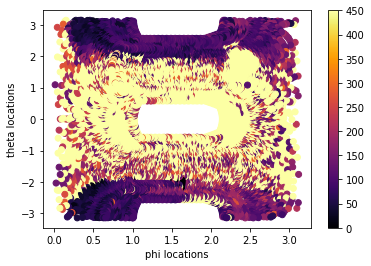

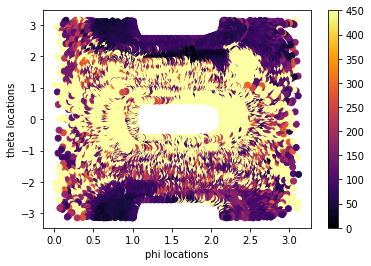

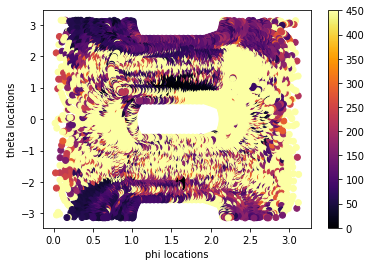

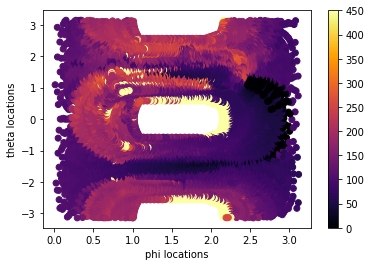

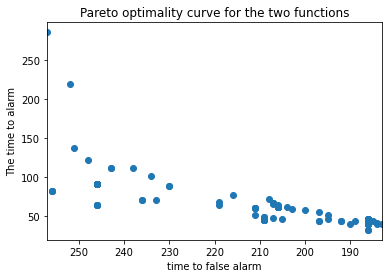

In [2]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "multiobjective_competing"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True

sources = []
# You can make this run much faster by taking only the first two sources, as seen below
#for data_dir in SMOKE_FOLDERS[:2]:
for data_dir in SMOKE_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
    
bad_sources = []
for data_dir in FALSE_ALARM_FOLDERS:
    bad_sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=FALSE_ALARM_THRESHOLD))
    
optimize(sources, bad_sources=bad_sources, num_detectors=NUM_DETECTORS, function_type=FUNCTION_TYPE, interpolation_method=INTERPOLATION_METHOD)

Run multiobjective optimization with counting objective. Uses $\phi$, $\theta$ parameterization and nearest interpolation method. The number of detectors isn't set, it is estimated from the number of sources and then optimized. 

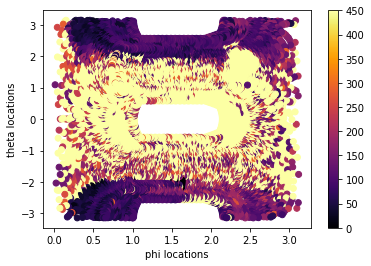

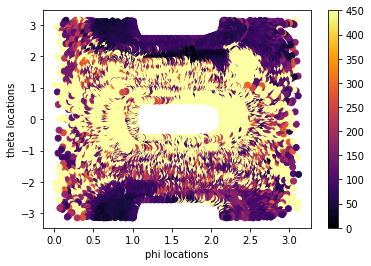

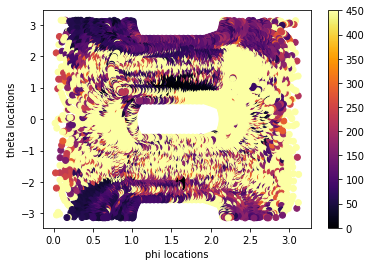

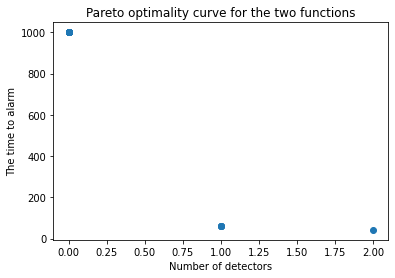

In [3]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "multiobjective_counting"
INTERPOLATION_METHOD = "nearest"
VIS = True

sources = []
for data_dir in SMOKE_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
    
optimize(sources, function_type=FUNCTION_TYPE, interpolation_method=INTERPOLATION_METHOD)

Run single objective optimization with $\phi$, $\theta$ parameterization.

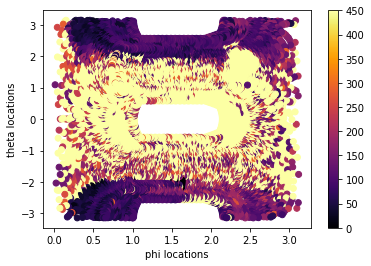

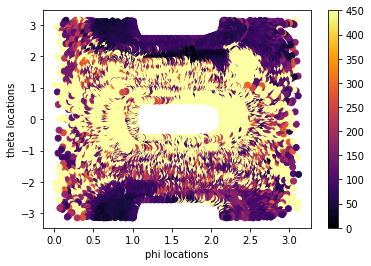

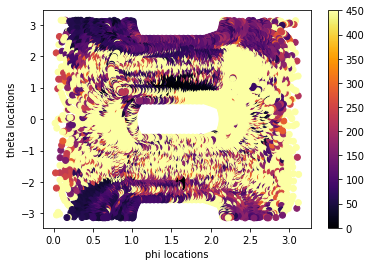

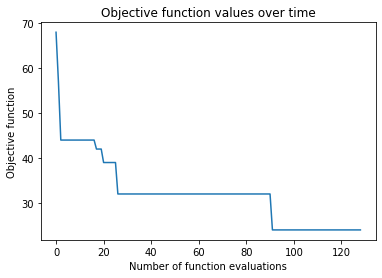

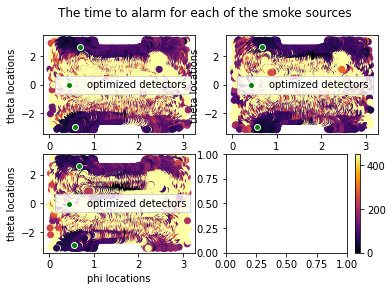

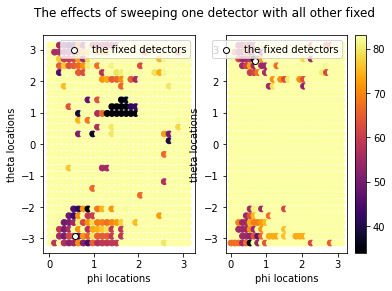

In [4]:
PARAMETERIZATION = "phi_theta" # could be "xy", "yz", "xz"
FUNCTION_TYPE = "worst_case" # could be "worst_case" "fastest", "second", "multiobjective_counting", "multiobjective_competing"
INTERPOLATION_METHOD = "nearest" # could be "linear"
NUM_DETECTORS = 2
VIS = True

sources = []
for data_dir in SMOKE_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
optimize(sources, num_detectors=NUM_DETECTORS, function_type=FUNCTION_TYPE, interpolation_method=INTERPOLATION_METHOD)

Run single objective optimization with X, Y, Z parameterization.

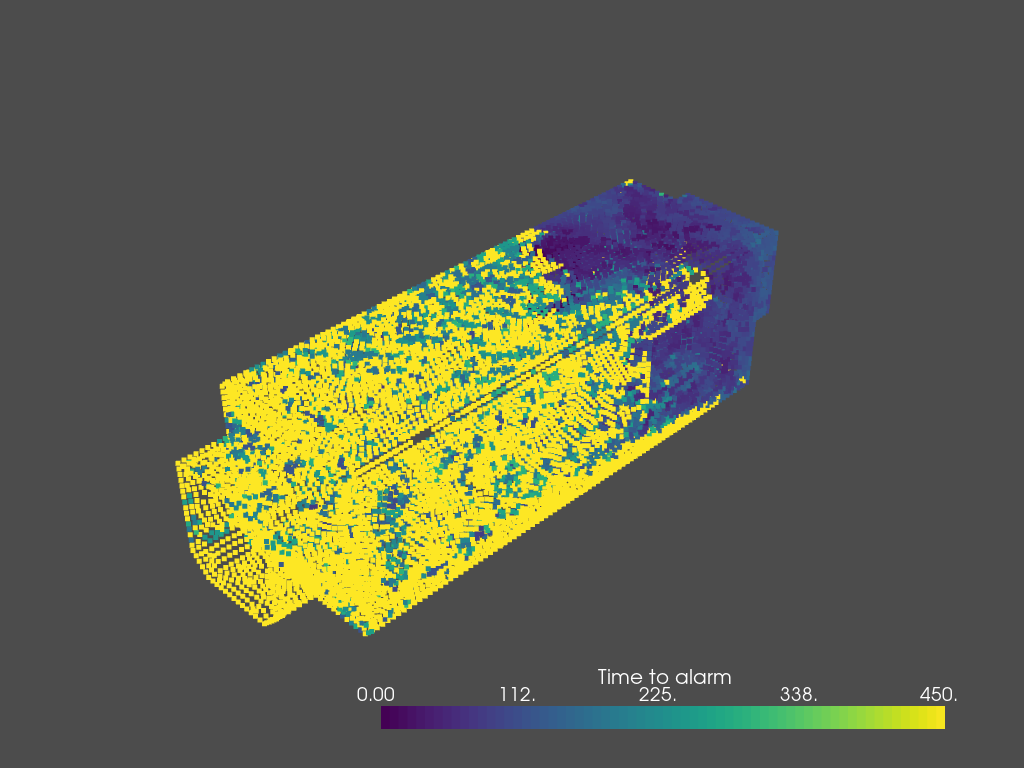

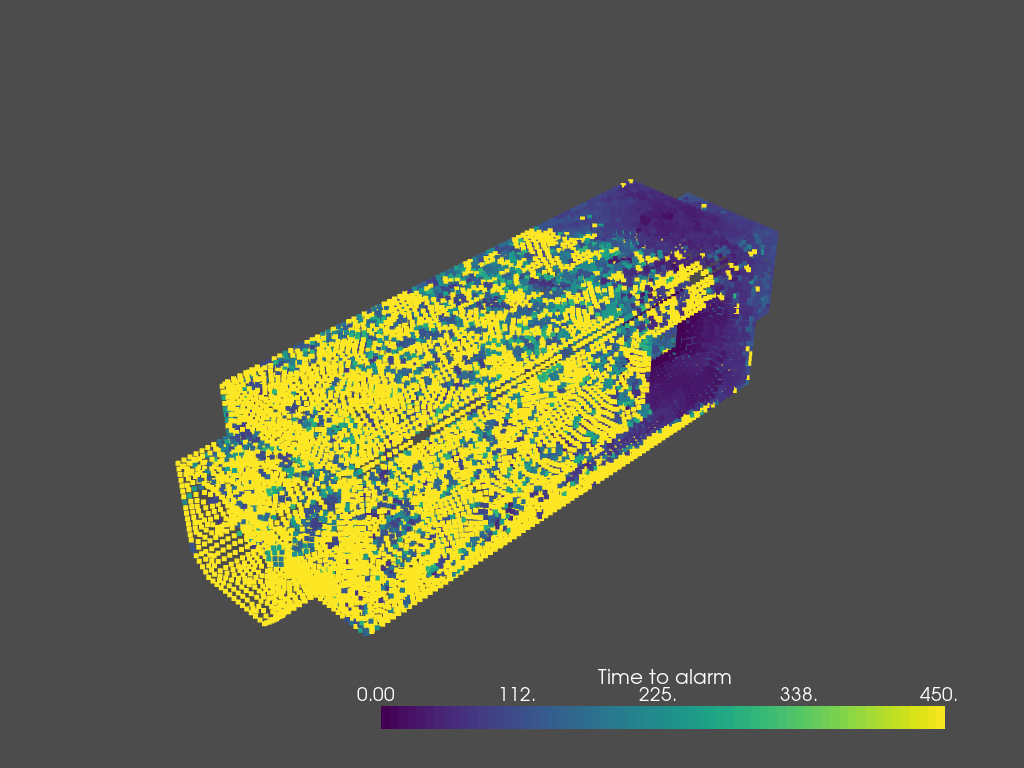

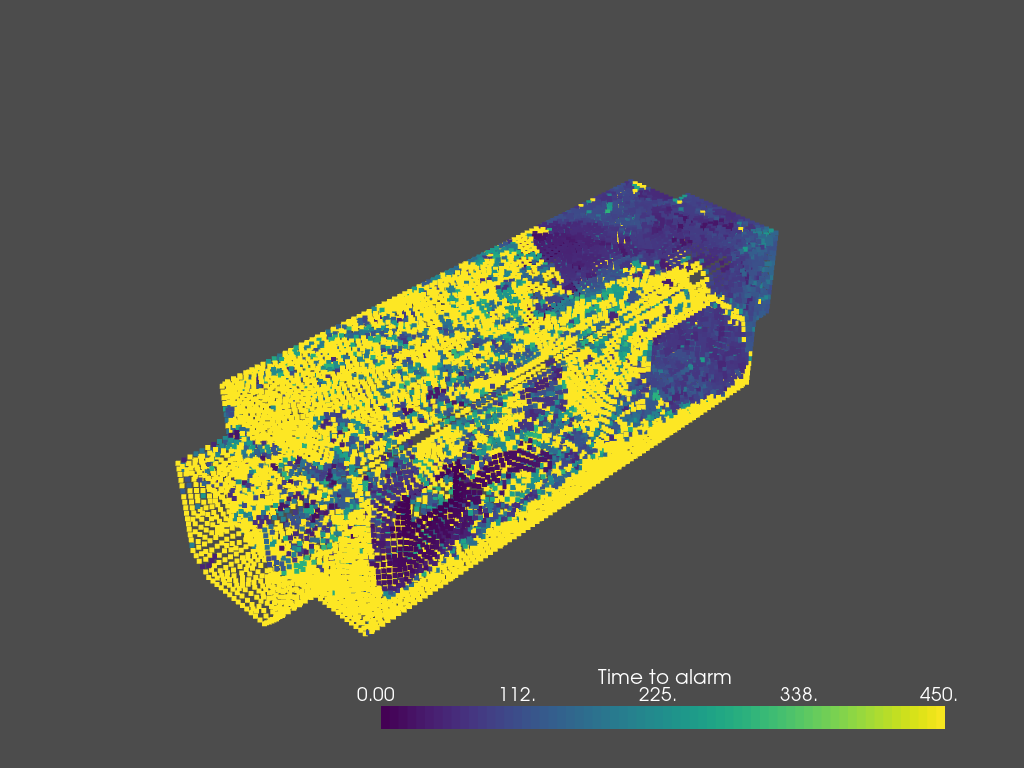

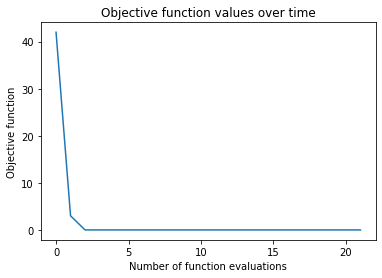

/home/david/dev/second_smoke/detector-placement-module/src/smokedetectoroptimization/visualization.py:96: UserWarning: Untested: may give spurious results.
  warnings.warn("Untested: may give spurious results.")


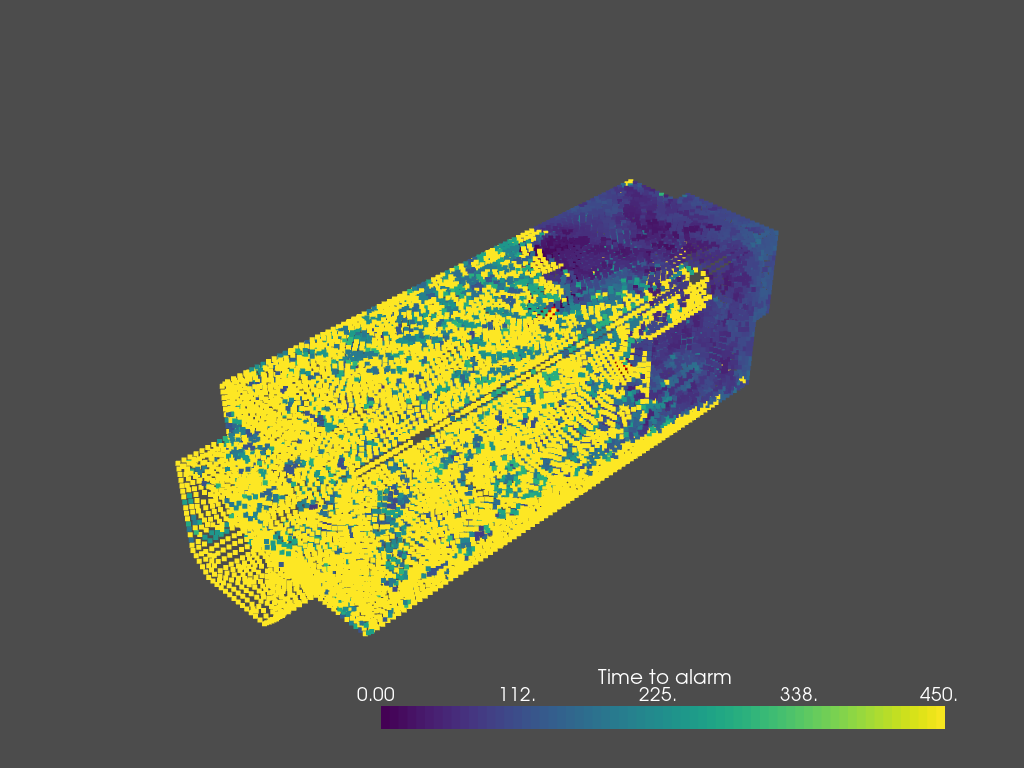

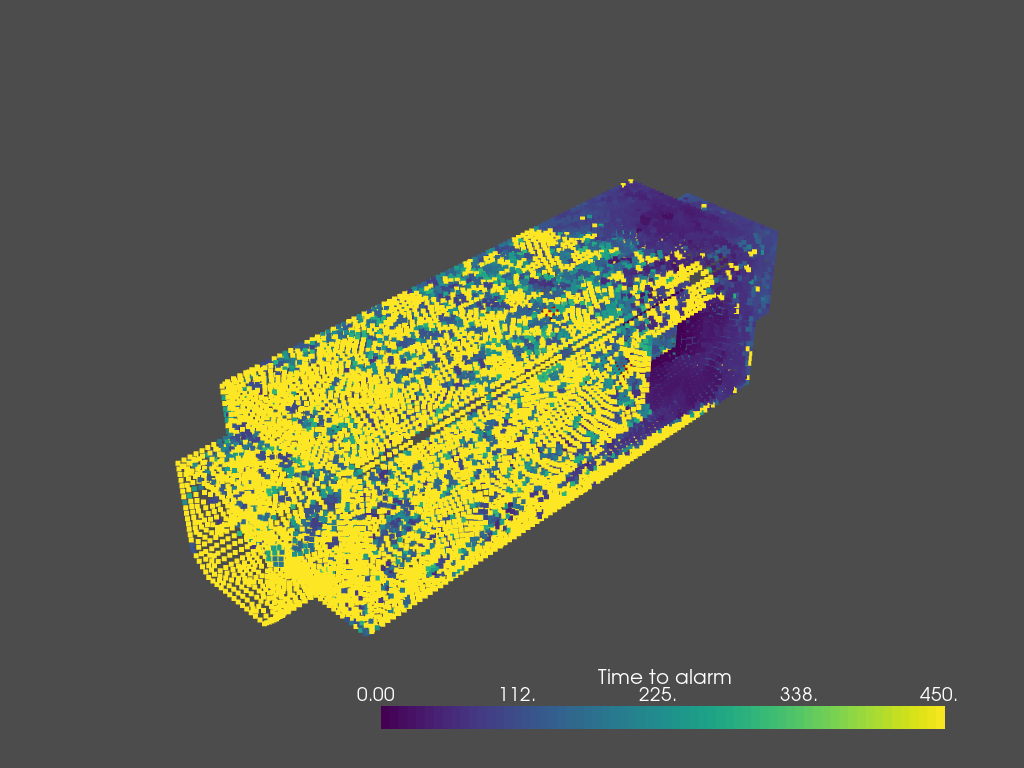

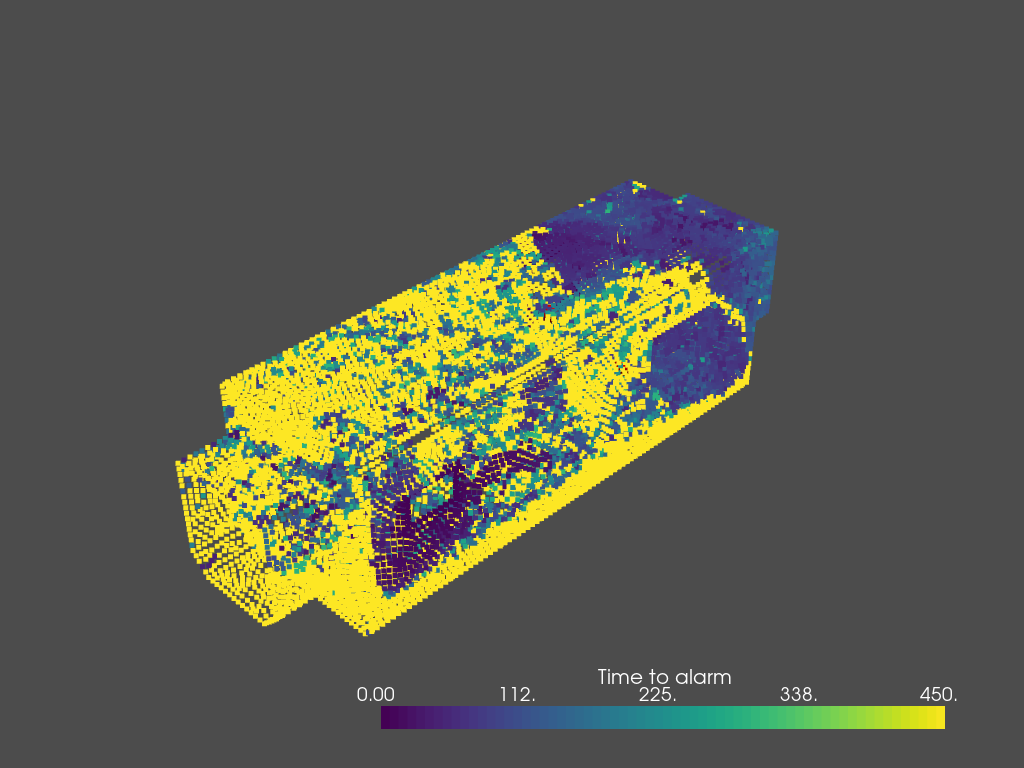

ERROR:root:Cannot visualize slices for 3D parameterization


In [5]:
PARAMETERIZATION = "xyz"
FUNCTION_TYPE = "worst_case"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True

sources = []
for data_dir in SMOKE_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
optimize(sources, num_detectors=NUM_DETECTORS, function_type=FUNCTION_TYPE, interpolation_method=INTERPOLATION_METHOD)